# ARTI308 - Lab 3 Assignment: Exploratory Data Analysis (EDA)
## Housing Price Dataset Analysis

**Student Name:** [Abdulaziz Mohammad AL-Khlawi]  
**Student ID:** [2240006095]  
**Date:** [2/11/2026]

---

## Dataset Description

This dataset contains information about housing prices and their characteristics. The goal is to understand the factors that influence house prices through exploratory data analysis.

**Features:**
- `price`: Price of the house
- `area`: Area of the house in square feet
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms
- `stories`: Number of stories
- `mainroad`: Whether the house is on the main road (yes/no)
- `guestroom`: Whether the house has a guest room (yes/no)
- `basement`: Whether the house has a basement (yes/no)
- `hotwaterheating`: Whether the house has hot water heating (yes/no)
- `airconditioning`: Whether the house has air conditioning (yes/no)
- `parking`: Number of parking spaces
- `prefarea`: Whether the house is in a preferred area (yes/no)
- `furnishingstatus`: Furnishing status (furnished/semi-furnished/unfurnished)

## Step 1: Import Required Libraries

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Dataset

In [19]:
# Load the dataset
df = pd.read_csv('Housing.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (545, 13)
Number of rows: 545
Number of columns: 13


## Step 3: Initial Data Exploration

In [20]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [22]:
# Get dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [23]:
# Display column names
print("Column names:")
print(df.columns.tolist())

Column names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [24]:
# Check data types
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


## Step 4: Check for Missing Values

In [25]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n" + "="*50)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Total missing values: 0
Percentage of missing values: 0.00%


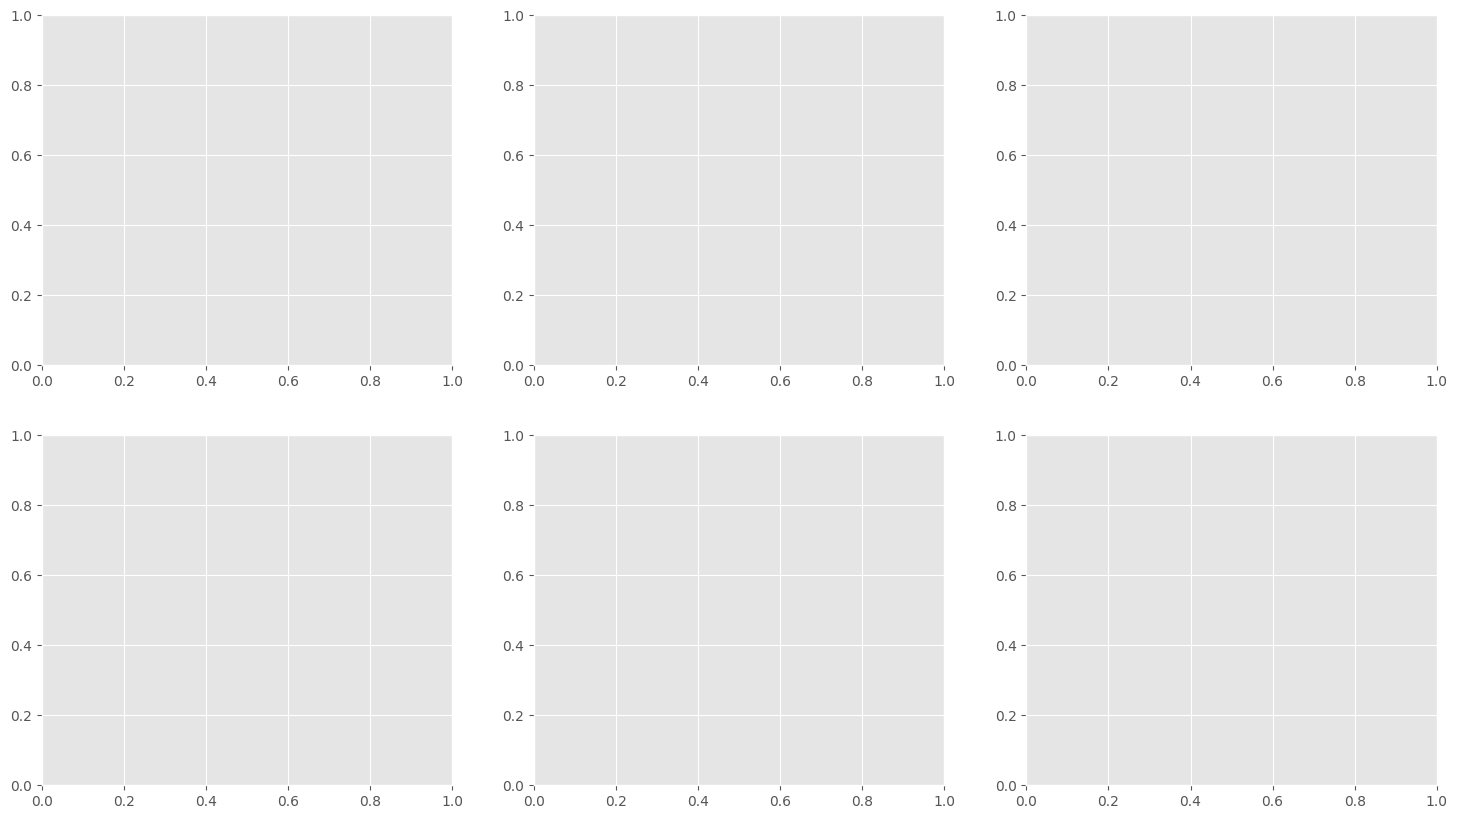

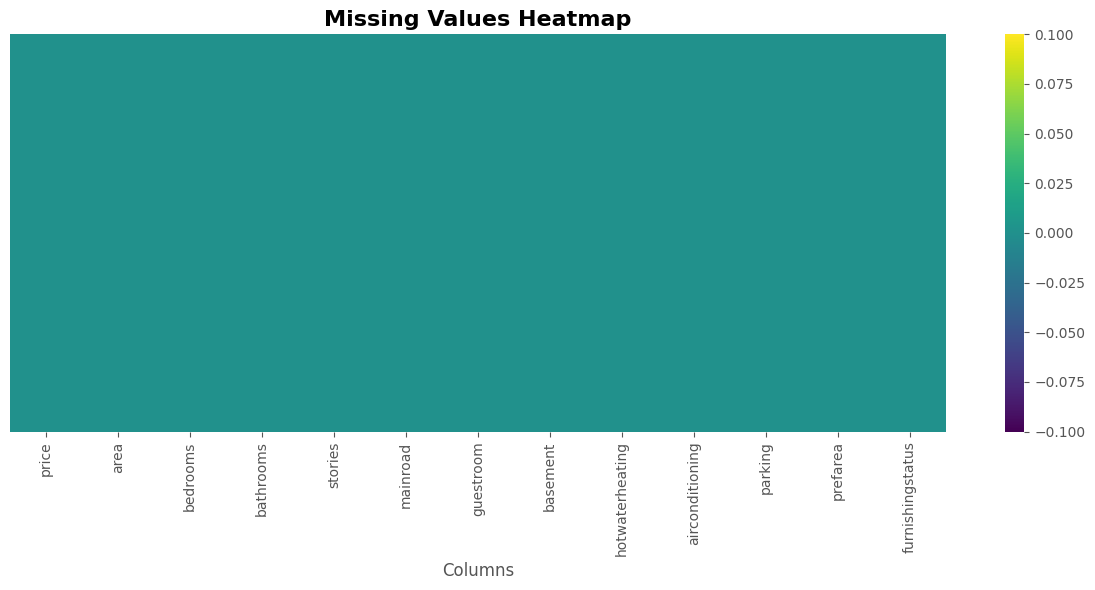

In [26]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Step 5: Check for Duplicate Values

In [27]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDisplaying duplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
else:
    print("No duplicate rows found!")

Number of duplicate rows: 0
No duplicate rows found!


## Step 6: Statistical Summary

In [28]:
# Statistical summary of numerical columns
print("Statistical Summary of Numerical Features:")
df.describe()

Statistical Summary of Numerical Features:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
# Statistical summary of categorical columns
print("Statistical Summary of Categorical Features:")
df.describe(include='object')

Statistical Summary of Categorical Features:


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [30]:
# Custom statistics for key numerical features
print("\nDetailed Statistics for Key Features:")
print("="*60)

numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode()[0]}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Range: {df[col].max() - df[col].min()}")


Detailed Statistics for Key Features:

PRICE:
  Mean: 4766729.25
  Median: 4340000.00
  Mode: 3500000
  Std Dev: 1870439.62
  Min: 1750000
  Max: 13300000
  Range: 11550000

AREA:
  Mean: 5150.54
  Median: 4600.00
  Mode: 6000
  Std Dev: 2170.14
  Min: 1650
  Max: 16200
  Range: 14550

BEDROOMS:
  Mean: 2.97
  Median: 3.00
  Mode: 3
  Std Dev: 0.74
  Min: 1
  Max: 6
  Range: 5

BATHROOMS:
  Mean: 1.29
  Median: 1.00
  Mode: 1
  Std Dev: 0.50
  Min: 1
  Max: 4
  Range: 3

STORIES:
  Mean: 1.81
  Median: 2.00
  Mode: 2
  Std Dev: 0.87
  Min: 1
  Max: 4
  Range: 3

PARKING:
  Mean: 0.69
  Median: 0.00
  Mode: 0
  Std Dev: 0.86
  Min: 0
  Max: 3
  Range: 3


## Step 7: Categorical Features Analysis

In [31]:
# Value counts for categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    print(f"\n{col.upper()} - Value Counts:")
    print(df[col].value_counts())
    print(f"Percentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)
    print("="*50)


MAINROAD - Value Counts:
mainroad
yes    468
no      77
Name: count, dtype: int64
Percentage distribution:
mainroad
yes    85.87156
no     14.12844
Name: proportion, dtype: float64

GUESTROOM - Value Counts:
guestroom
no     448
yes     97
Name: count, dtype: int64
Percentage distribution:
guestroom
no     82.201835
yes    17.798165
Name: proportion, dtype: float64

BASEMENT - Value Counts:
basement
no     354
yes    191
Name: count, dtype: int64
Percentage distribution:
basement
no     64.954128
yes    35.045872
Name: proportion, dtype: float64

HOTWATERHEATING - Value Counts:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Percentage distribution:
hotwaterheating
no     95.412844
yes     4.587156
Name: proportion, dtype: float64

AIRCONDITIONING - Value Counts:
airconditioning
no     373
yes    172
Name: count, dtype: int64
Percentage distribution:
airconditioning
no     68.440367
yes    31.559633
Name: proportion, dtype: float64

PREFAREA - Value Counts:
prefarea
no

## Step 8: Univariate Analysis - Numerical Features

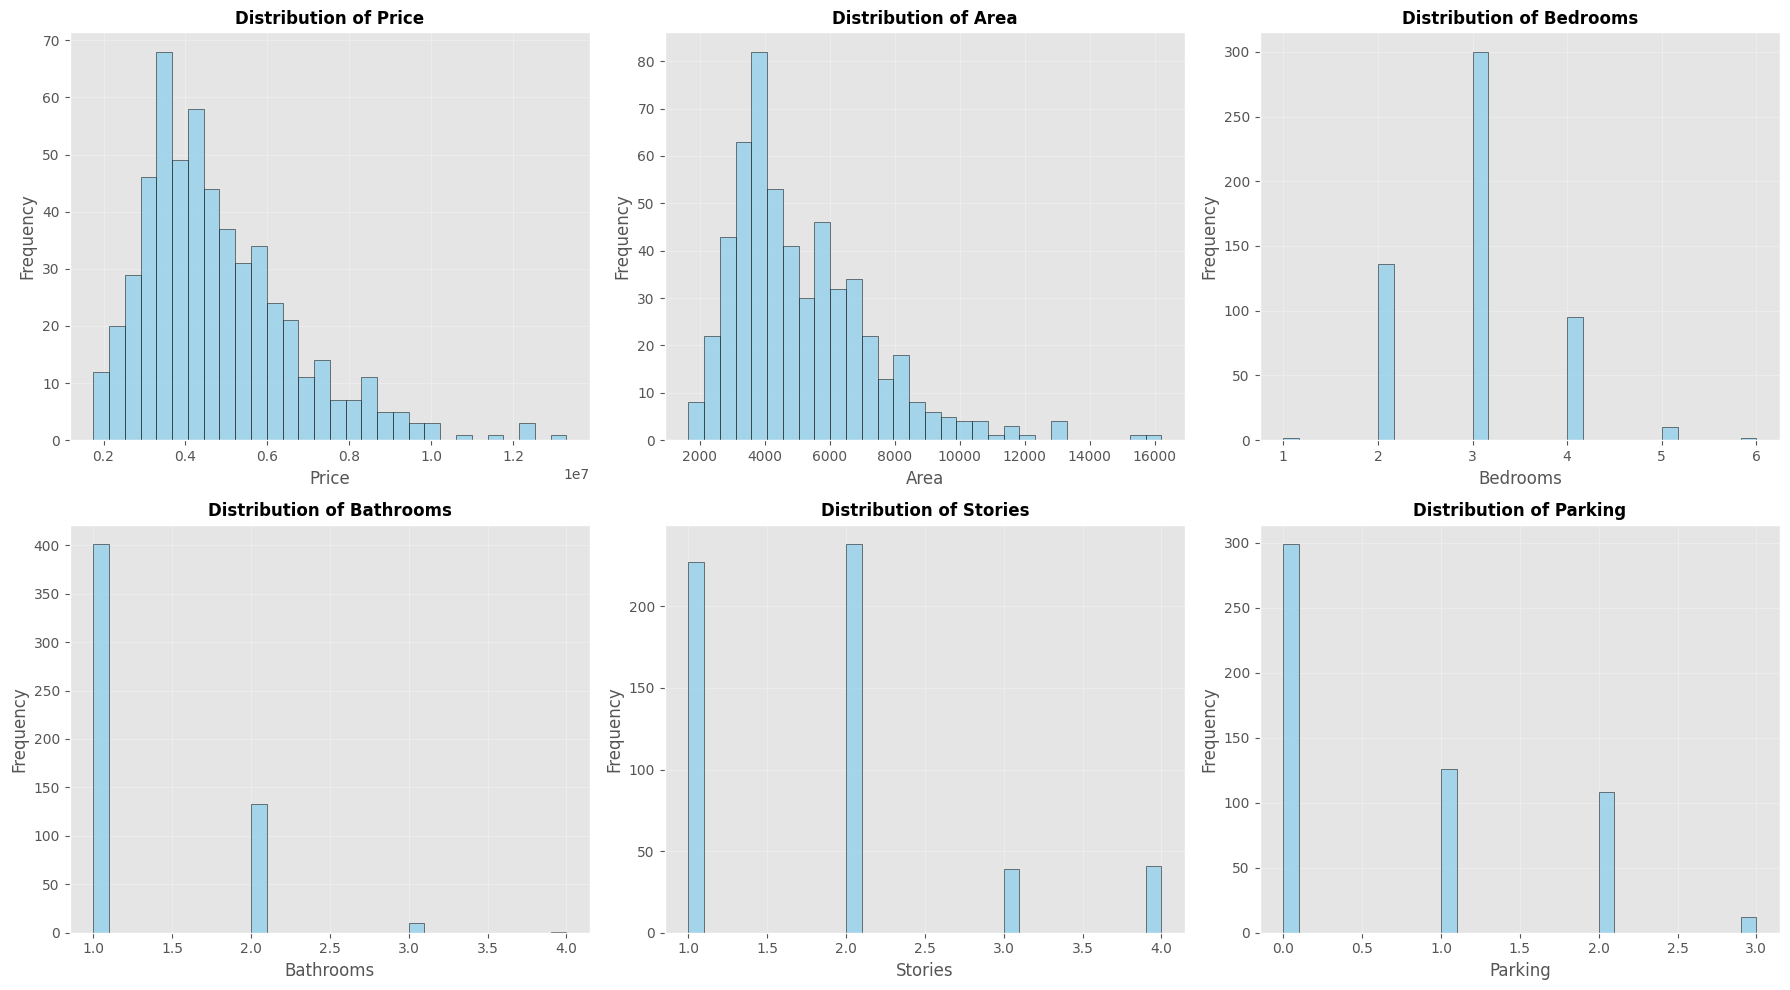

In [32]:
# Histograms for numerical features
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

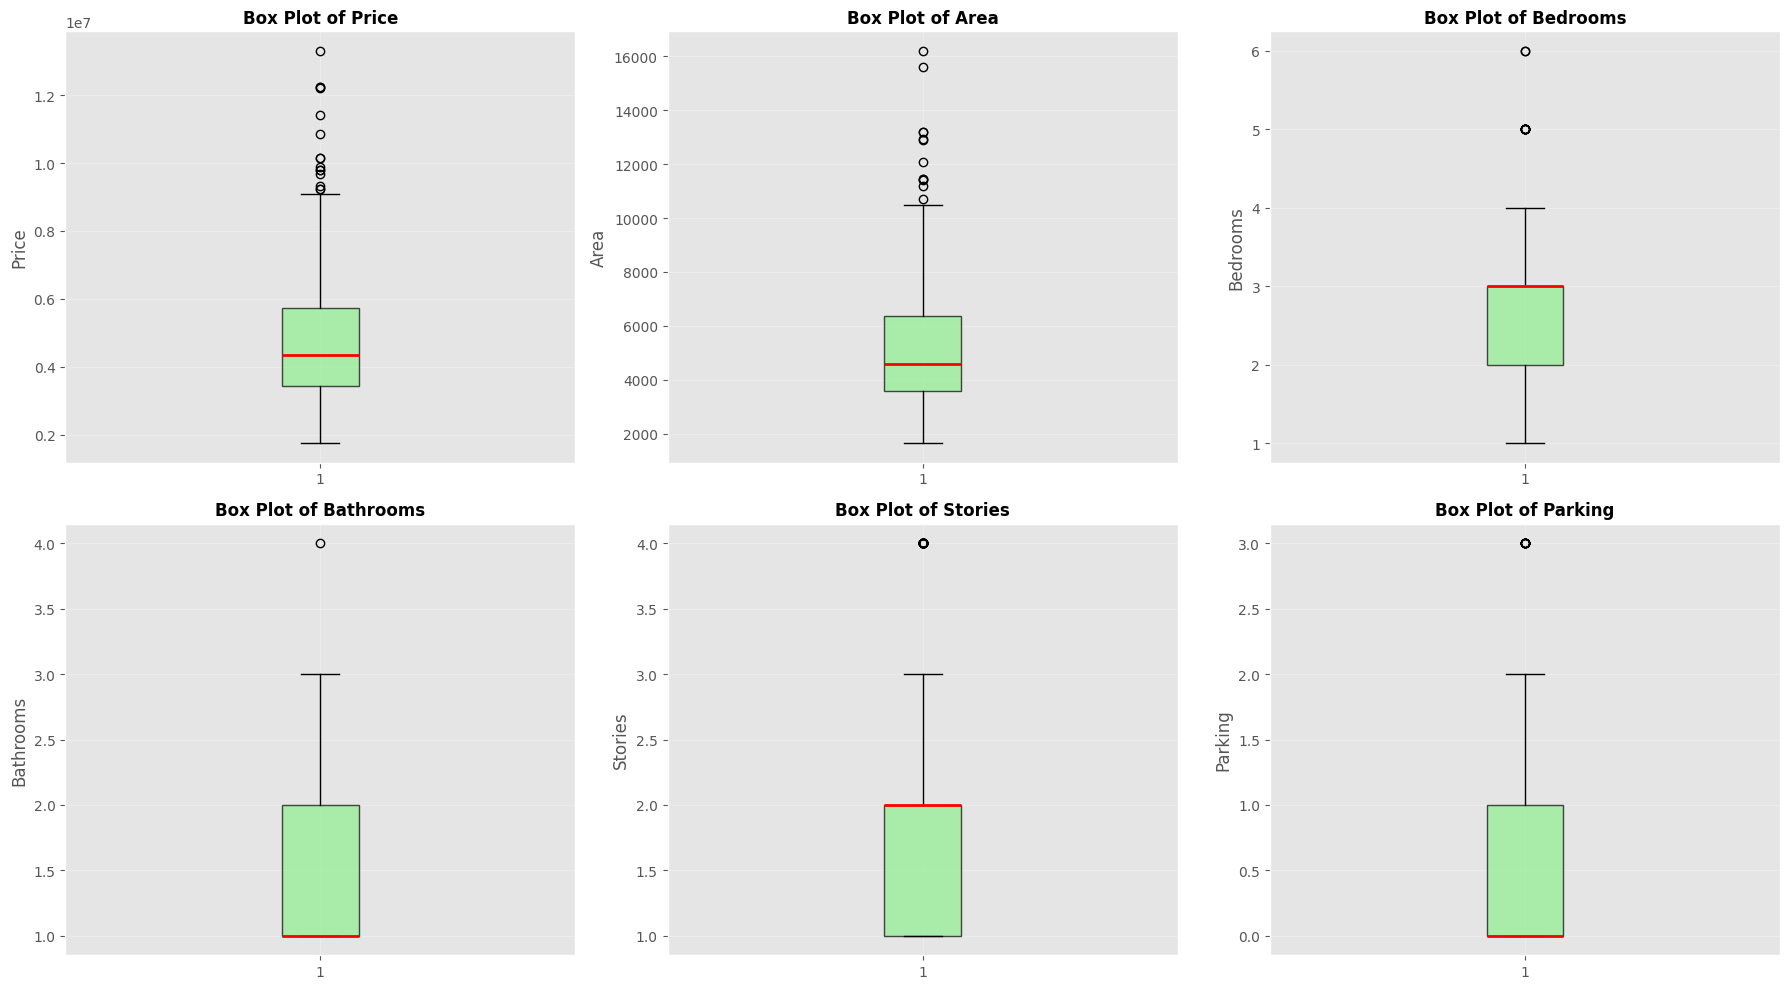

In [33]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightgreen', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot of {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col.capitalize())
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 9: Univariate Analysis - Categorical Features

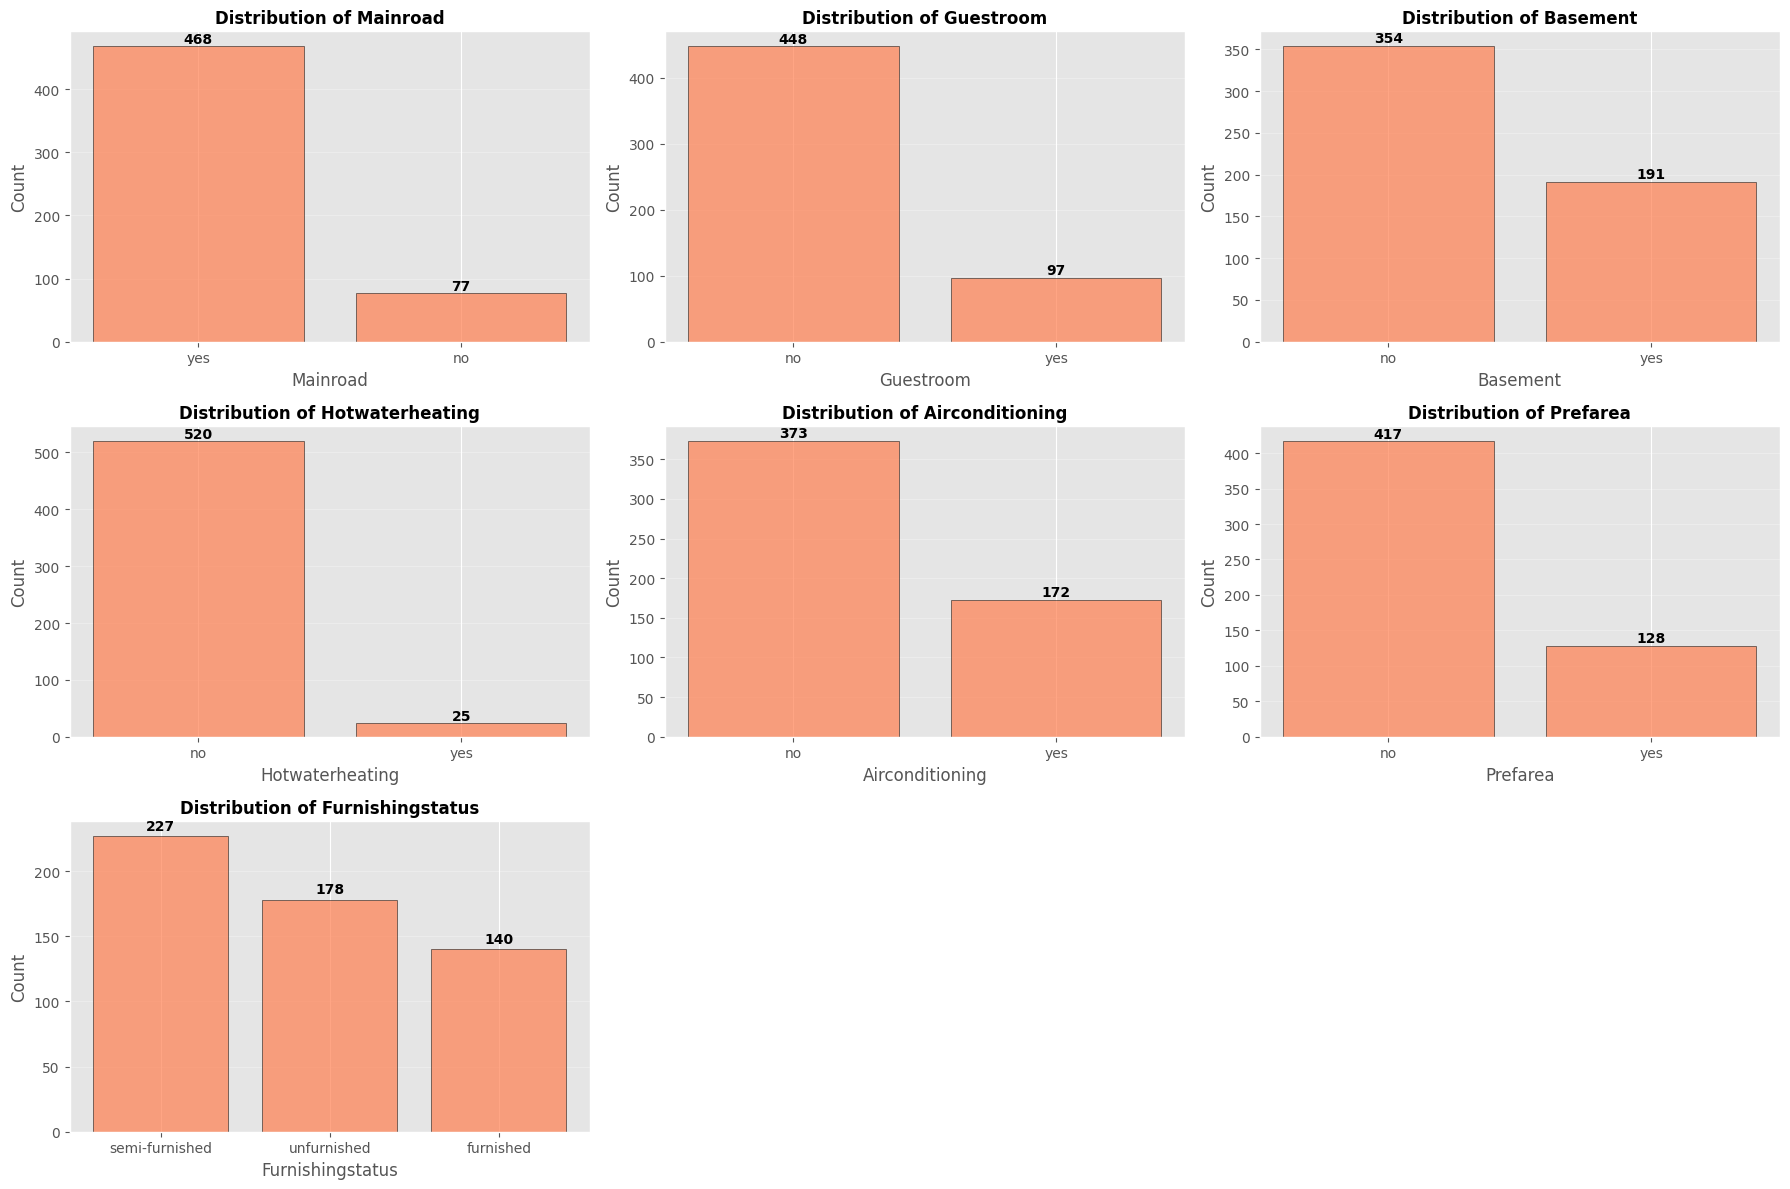

In [34]:
# Bar plots for categorical features
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

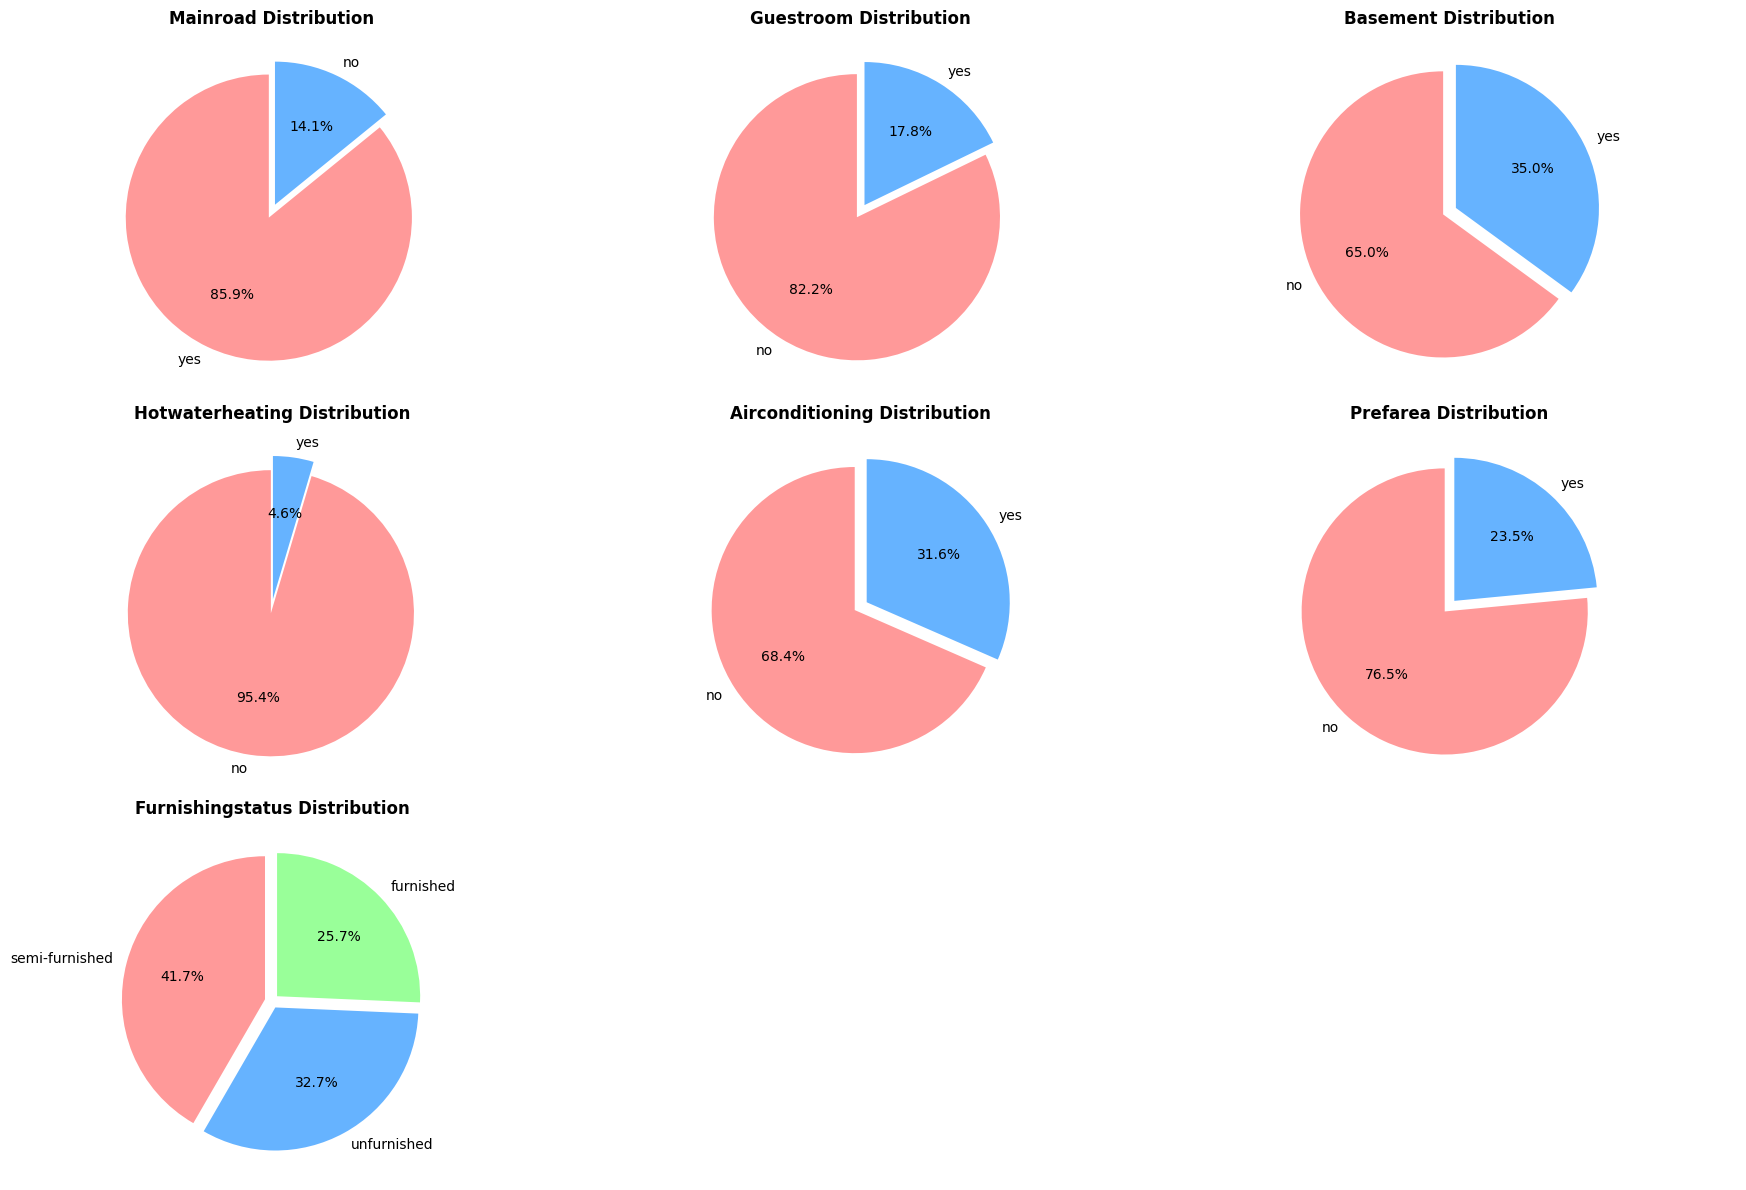

In [35]:
# Pie charts for categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0', '#ffb3e6']

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
                  colors=colors[:len(value_counts)], startangle=90, explode=[0.05] * len(value_counts))
    axes[idx].set_title(f'{col.capitalize()} Distribution', fontsize=12, fontweight='bold')

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Step 10: Outlier Detection Using IQR Method

In [36]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

print("Outlier Analysis for Numerical Features:")
print("="*70)

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col.upper()}:")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    print(f"  Percentage of Outliers: {(len(outliers)/len(df)*100):.2f}%")

Outlier Analysis for Numerical Features:

PRICE:
  Lower Bound: -35000.00
  Upper Bound: 9205000.00
  Number of Outliers: 15
  Percentage of Outliers: 2.75%

AREA:
  Lower Bound: -540.00
  Upper Bound: 10500.00
  Number of Outliers: 12
  Percentage of Outliers: 2.20%

BEDROOMS:
  Lower Bound: 0.50
  Upper Bound: 4.50
  Number of Outliers: 12
  Percentage of Outliers: 2.20%

BATHROOMS:
  Lower Bound: -0.50
  Upper Bound: 3.50
  Number of Outliers: 1
  Percentage of Outliers: 0.18%

STORIES:
  Lower Bound: -0.50
  Upper Bound: 3.50
  Number of Outliers: 41
  Percentage of Outliers: 7.52%

PARKING:
  Lower Bound: -1.50
  Upper Bound: 2.50
  Number of Outliers: 12
  Percentage of Outliers: 2.20%


## Step 11: Bivariate Analysis - Numerical vs Numerical

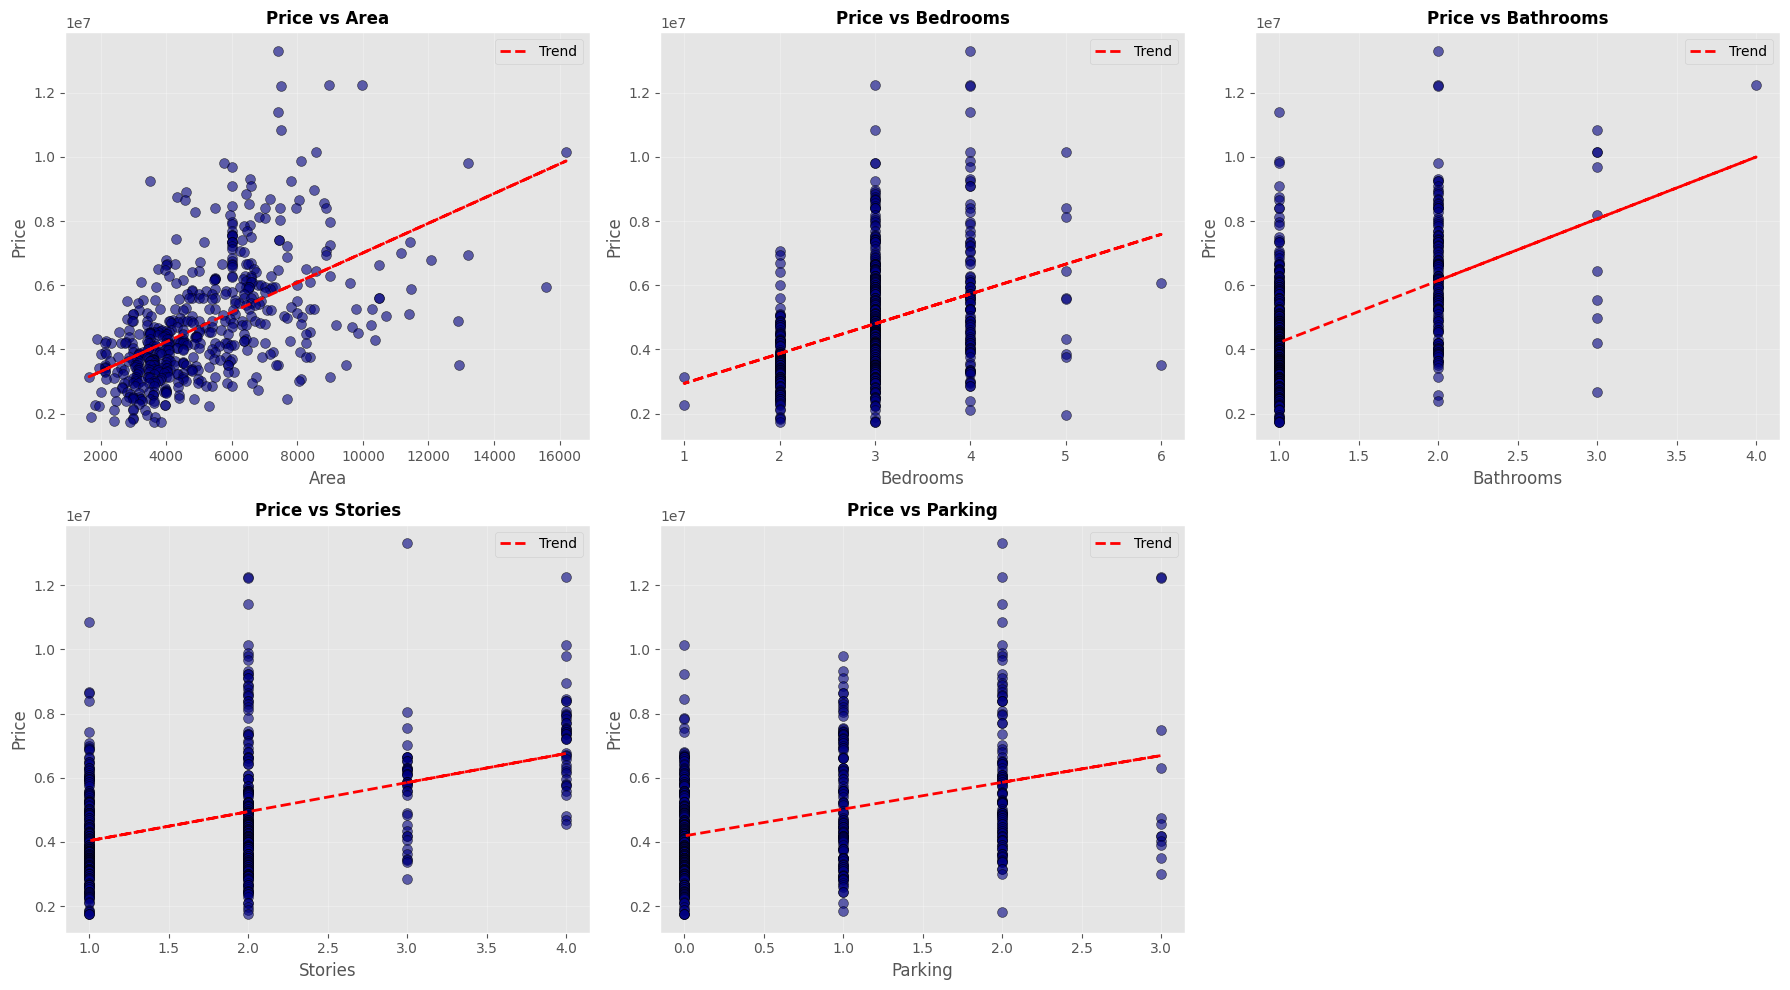

In [37]:
# Scatter plots: Price vs other numerical features
features_to_plot = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(features_to_plot):
    axes[idx].scatter(df[col], df['price'], alpha=0.6, color='navy', edgecolors='black', s=50)
    axes[idx].set_title(f'Price vs {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Price')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[col], df['price'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", linewidth=2, label='Trend')
    axes[idx].legend()

# Hide last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

Creating pair plot (this may take a moment)...


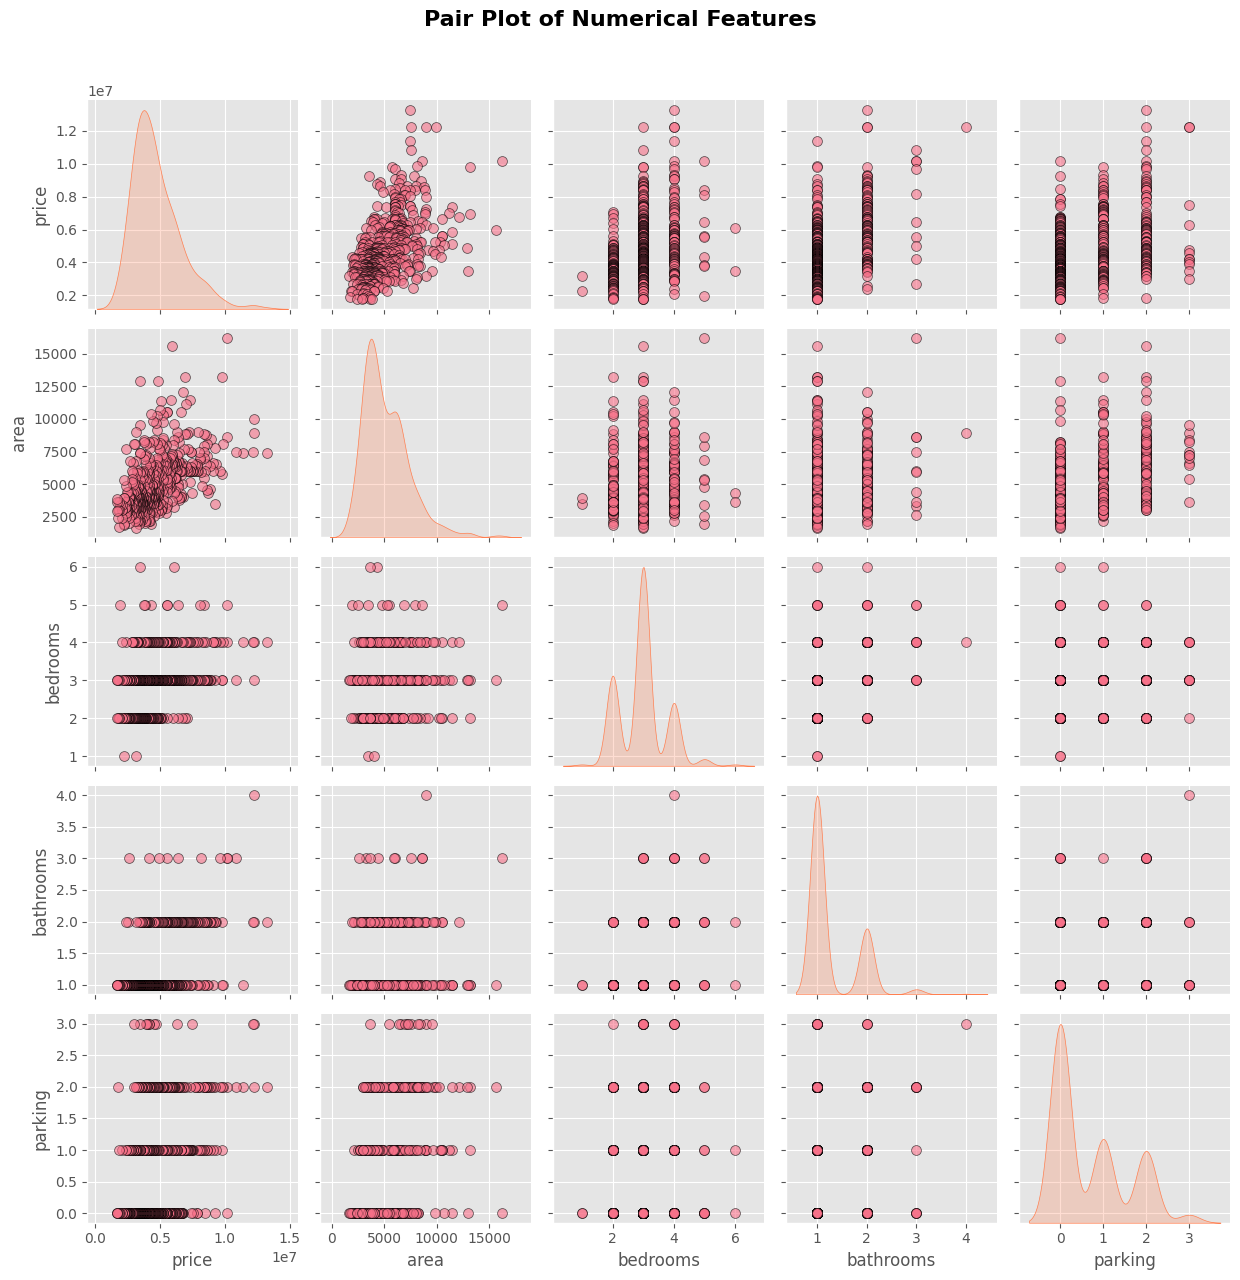

In [38]:
# Pair plot for numerical features
print("Creating pair plot (this may take a moment)...")
selected_features = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
             diag_kws={'color': 'coral'})
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 12: Correlation Analysis

Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


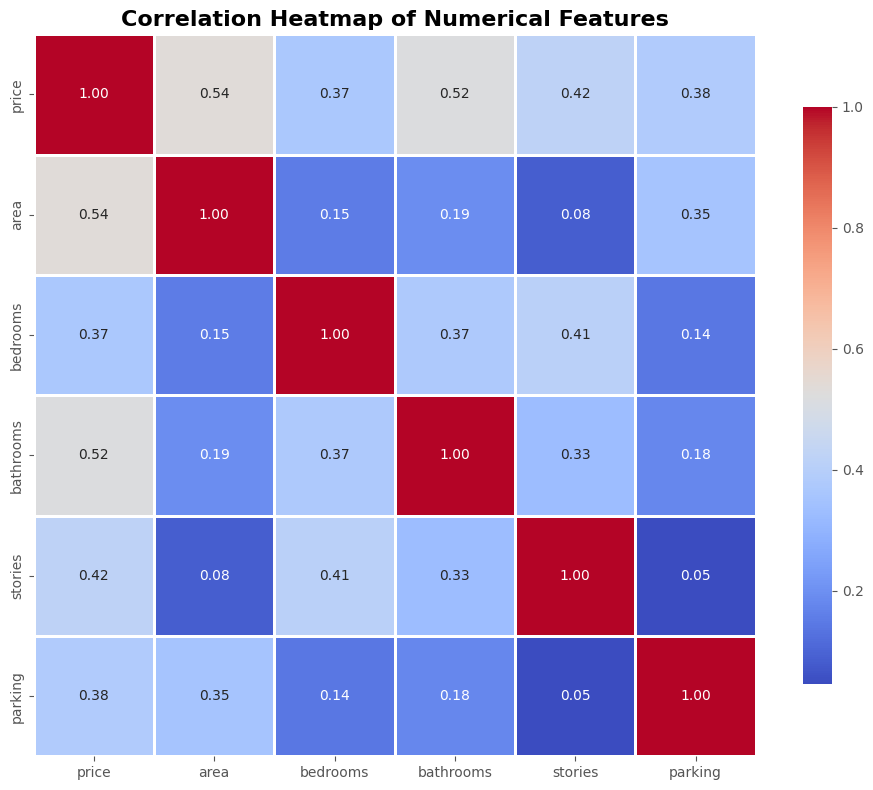

In [39]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Price (sorted):
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


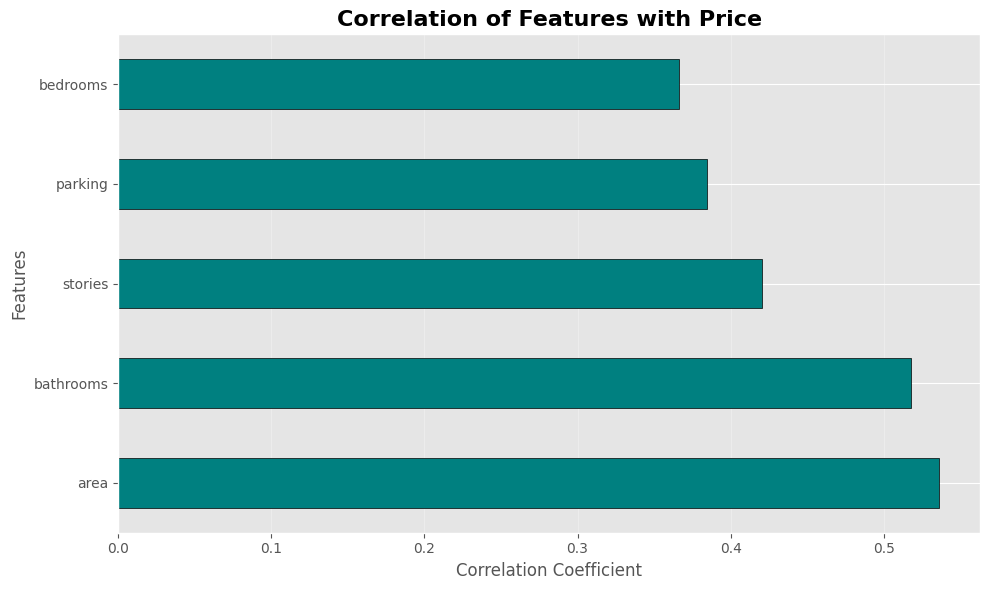

In [40]:
# Correlation with price (sorted)
price_correlation = df[numerical_cols].corr()['price'].sort_values(ascending=False)

print("Correlation with Price (sorted):")
print(price_correlation)

# Visualize correlation with price
plt.figure(figsize=(10, 6))
price_correlation.drop('price').plot(kind='barh', color='teal', edgecolor='black')
plt.title('Correlation of Features with Price', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Step 13: Bivariate Analysis - Categorical vs Numerical

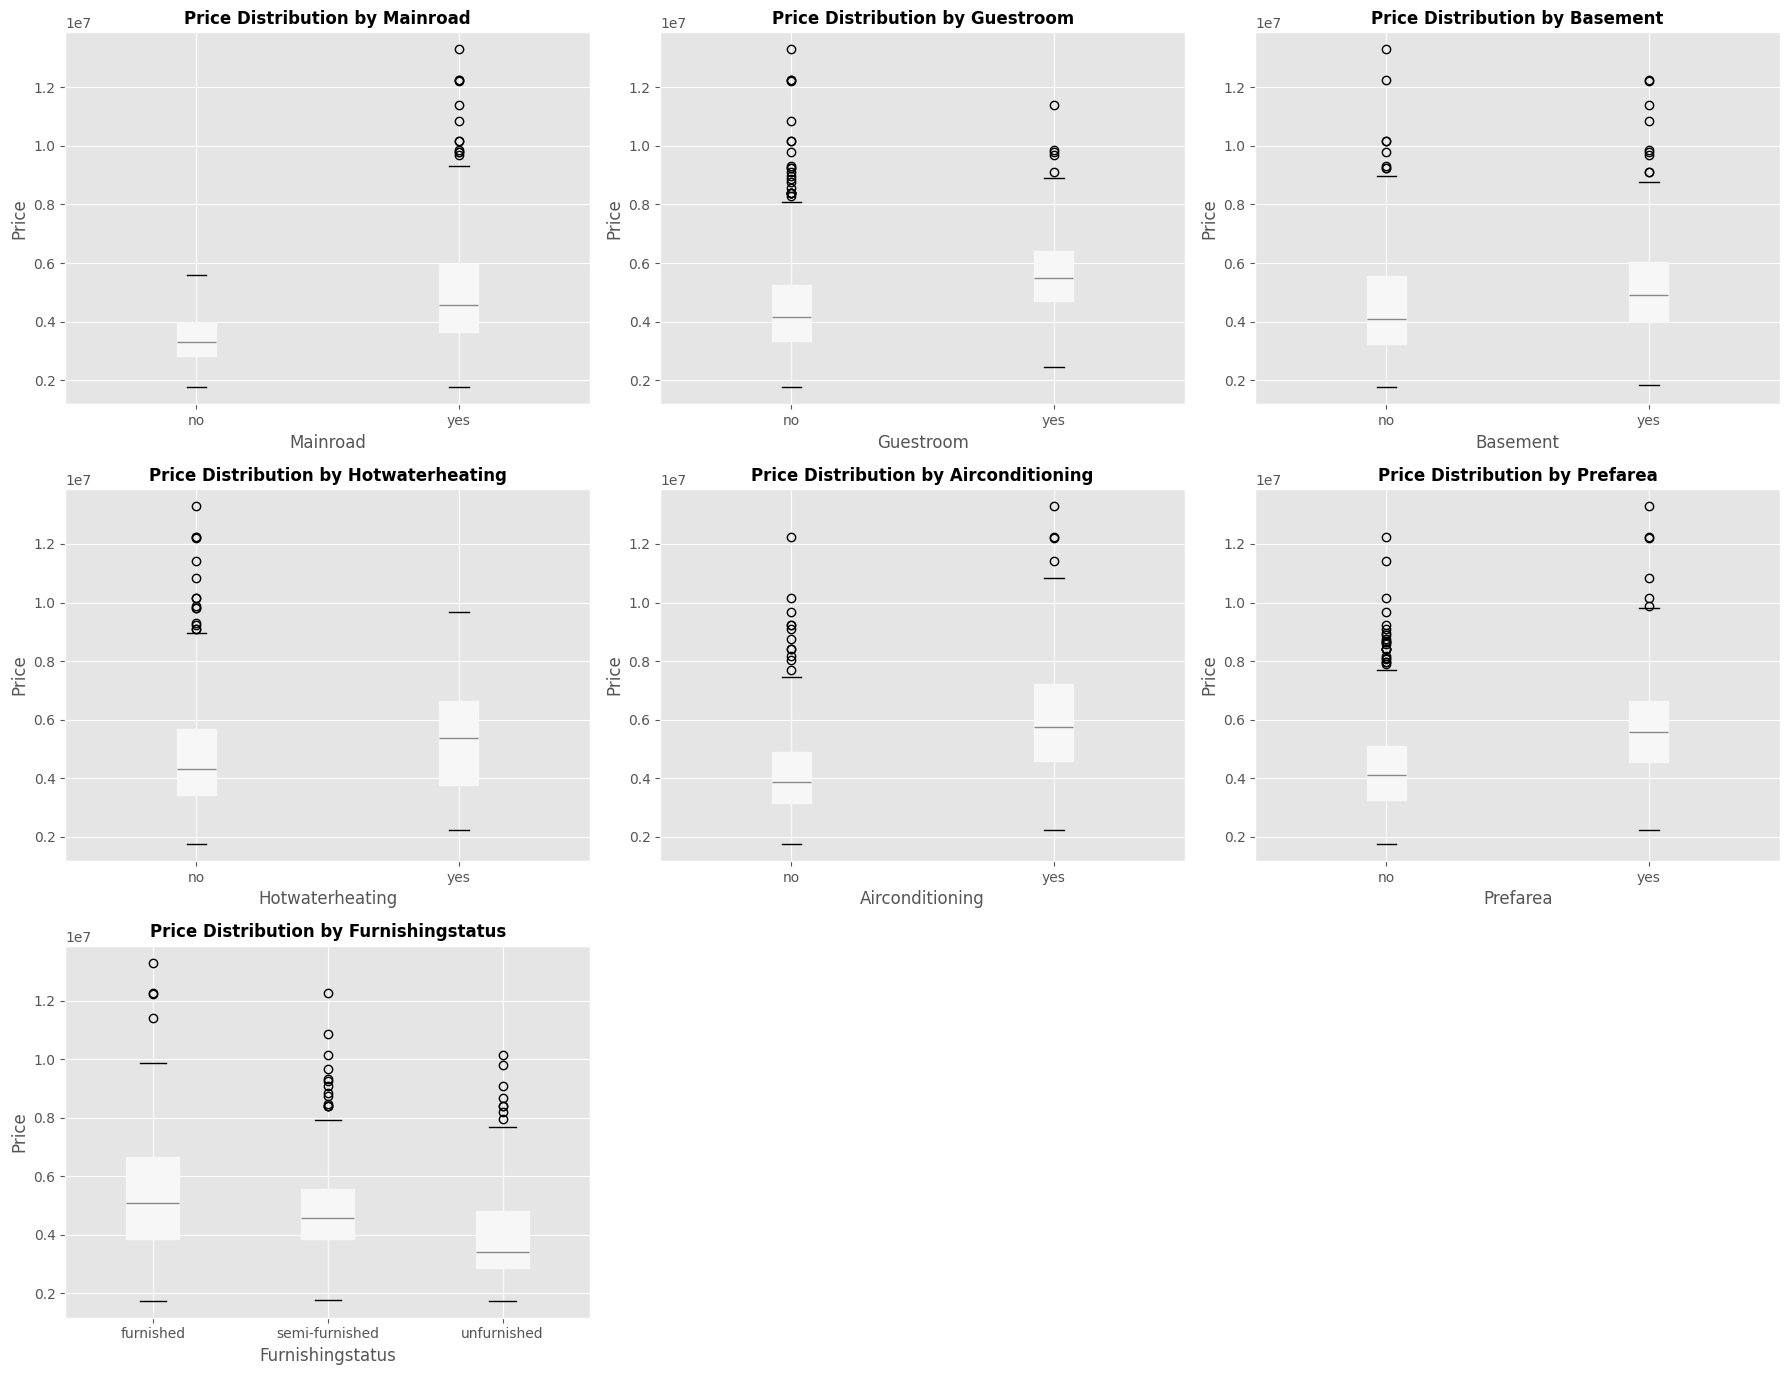

In [41]:
# Box plots: Price by categorical features
categorical_cols_for_analysis = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                 'airconditioning', 'prefarea', 'furnishingstatus']

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols_for_analysis):
    df.boxplot(column='price', by=col, ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'Price Distribution by {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Price')
    axes[idx].get_figure().suptitle('')  # Remove default title

# Hide extra subplots
for idx in range(len(categorical_cols_for_analysis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

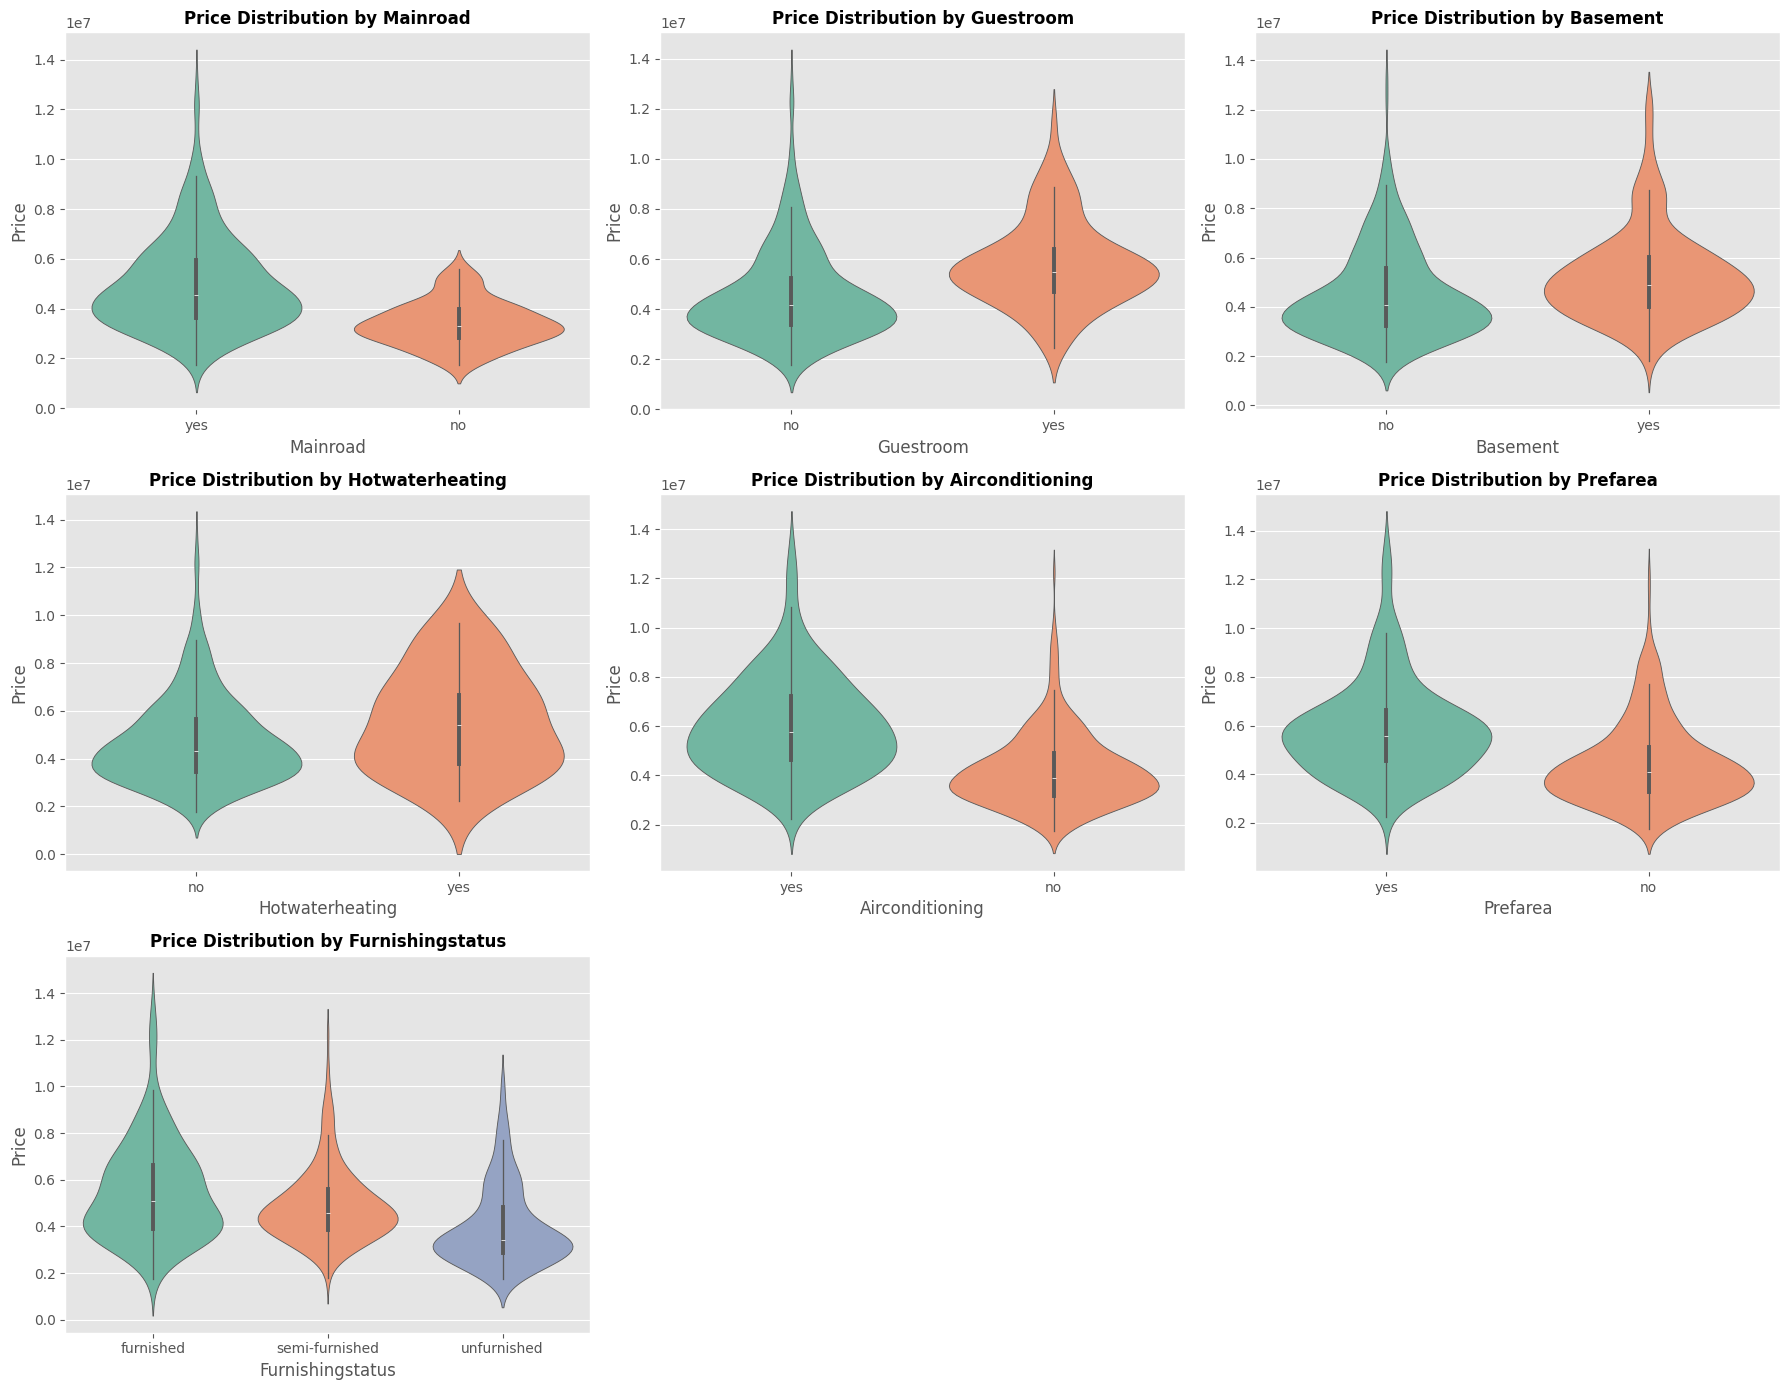

In [42]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols_for_analysis):
    sns.violinplot(data=df, x=col, y='price', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Price Distribution by {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Price')

# Hide extra subplots
for idx in range(len(categorical_cols_for_analysis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [43]:
# Statistical comparison by categorical features
print("Average Price by Categorical Features:")
print("="*70)

for col in categorical_cols_for_analysis:
    print(f"\n{col.upper()}:")
    grouped_stats = df.groupby(col)['price'].agg(['mean', 'median', 'std', 'count'])
    print(grouped_stats)
    print("-"*70)

Average Price by Categorical Features:

MAINROAD:
                  mean     median           std  count
mainroad                                              
no        3.398905e+06  3290000.0  8.947355e+05     77
yes       4.991777e+06  4550000.0  1.893639e+06    468
----------------------------------------------------------------------

GUESTROOM:
                   mean     median           std  count
guestroom                                              
no         4.544546e+06  4165000.0  1.827182e+06    448
yes        5.792897e+06  5495000.0  1.727829e+06     97
----------------------------------------------------------------------

BASEMENT:
                  mean     median           std  count
basement                                              
no        4.509966e+06  4077500.0  1.841116e+06    354
yes       5.242615e+06  4900000.0  1.835394e+06    191
----------------------------------------------------------------------

HOTWATERHEATING:
                         mean   

## Step 14: Advanced Visualizations

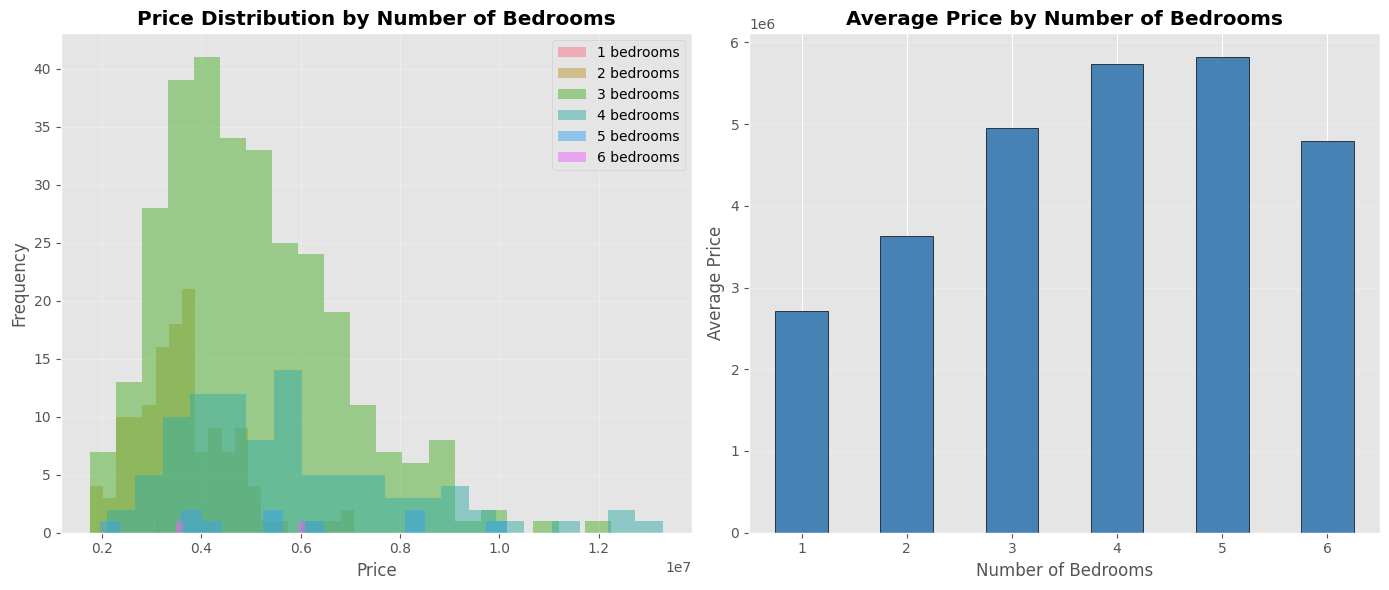

In [44]:
# Price distribution by number of bedrooms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for bedroom in sorted(df['bedrooms'].unique()):
    subset = df[df['bedrooms'] == bedroom]['price']
    plt.hist(subset, alpha=0.5, label=f'{bedroom} bedrooms', bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution by Number of Bedrooms', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df.groupby('bedrooms')['price'].mean().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

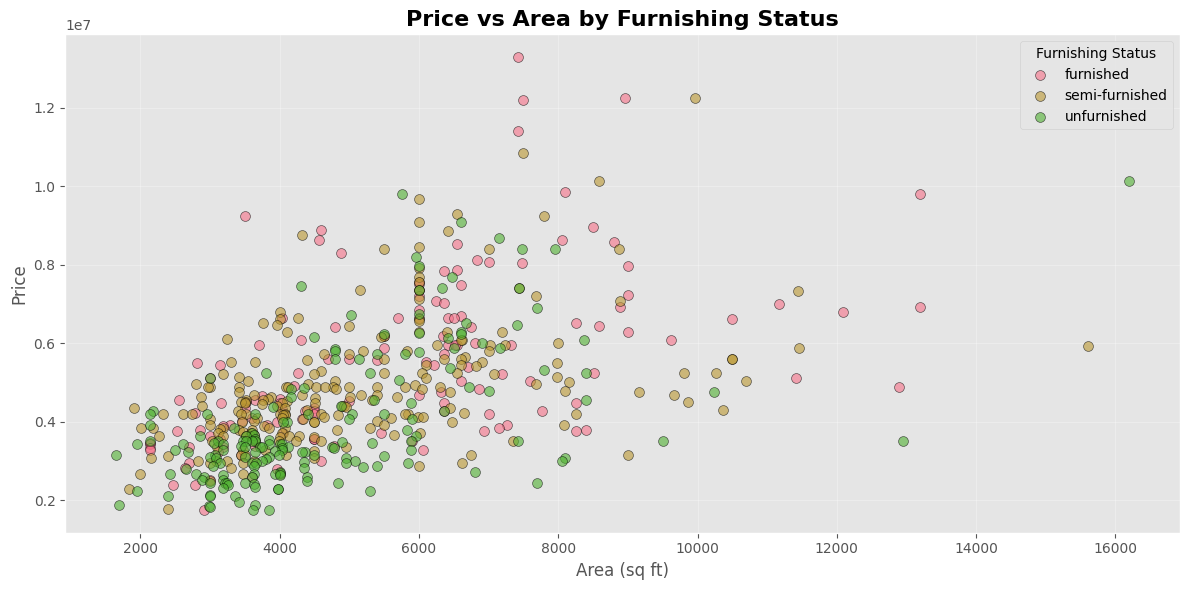

In [45]:
# Price vs Area colored by Furnishing Status
plt.figure(figsize=(12, 6))
for status in df['furnishingstatus'].unique():
    subset = df[df['furnishingstatus'] == status]
    plt.scatter(subset['area'], subset['price'], label=status, alpha=0.6, s=50, edgecolors='black')

plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Area by Furnishing Status', fontsize=16, fontweight='bold')
plt.legend(title='Furnishing Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

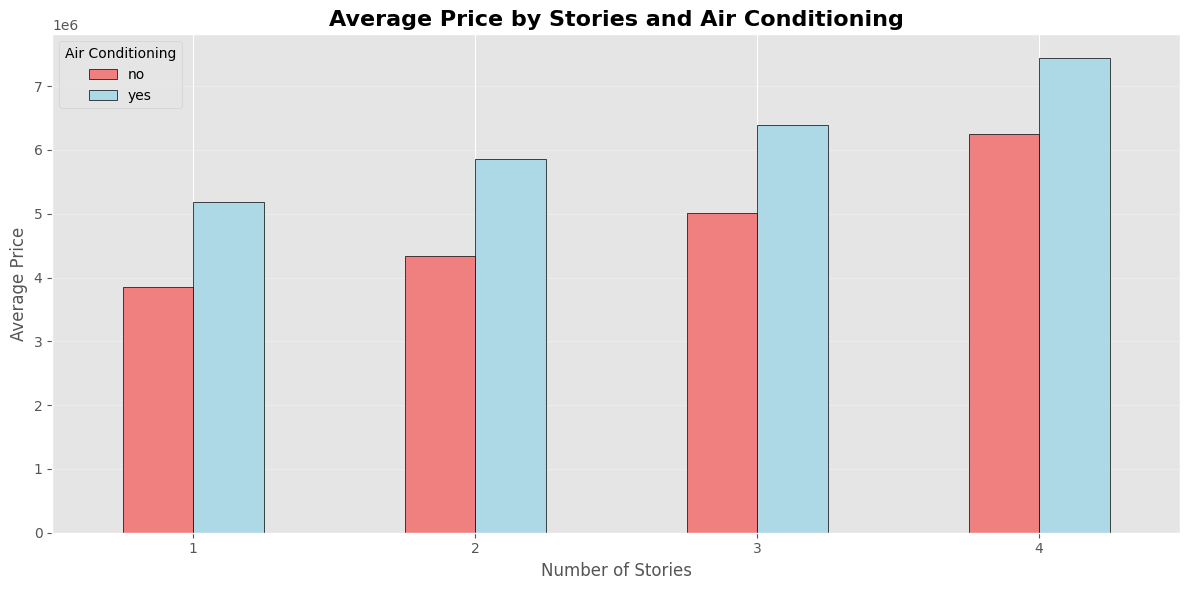

In [46]:
# Average price by number of stories and air conditioning
plt.figure(figsize=(12, 6))

pivot_data = df.pivot_table(values='price', index='stories', columns='airconditioning', aggfunc='mean')
pivot_data.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')

plt.xlabel('Number of Stories', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price by Stories and Air Conditioning', fontsize=16, fontweight='bold')
plt.legend(title='Air Conditioning')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()